In [1]:
# 일부만 할당된 GPU 메모리를 실행하는 동안 필요한만큼 늘릴 수 있도록 설정함
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [2]:
import os, shutil # shutil: 파일 및 디렉터리 작업

In [3]:
import keras 
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [4]:
import tensorflow as tf
tf.__version__

'1.13.1'

In [5]:

# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = './datasets/cats_and_dogs/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './datasets/cats_and_dogs_small'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
    shutil.rmtree(base_dir)   # 디렉터리 및 하위 파일 제거
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) # ./datasets/cats_and_dogs/train/cat.1.jpg
    dst = os.path.join(train_cats_dir, fname)  # ./datasets/cats_and_dogs/train/cats/cat.1.jpg
    shutil.copyfile(src, dst) # src 주소에 있는 파일을 dst(주소+이름)로 저장

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
from keras import models, layers

In [7]:
# 모델 생성
from keras import layers
from keras import models

model = models.Sequential()
# cnn 층 만들기
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
# 풀링 층 만들기
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) # 한 장을 1차원 텐서로 한 2차원 텐서
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.summary() # padding="same"이 아니므로 줄어듦

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [9]:
# 
from keras import optimizers
model.compile(loss = 'binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

# 데이터 전처리

In [10]:
# 아래 이미지처리 함수 설명: https://keras.io/preprocessing/image/

# 이미지 처리를 위한 헬퍼 도구 
from keras.preprocessing.image import ImageDataGenerator
# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# generator에는 data와 클래스가 짝지어 저장하는 이터러블 객체
train_generator = train_datagen.flow_from_directory(
        # 데이터를 참조할 타겟 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블(개,고양이)이 필요합니다
        # 개,고양이 이진분류이므로 이진 원한인코더로 클래스 레이블 설정
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
for data_batch, labels_batch in train_generator:
    print('배치 테이블 크기: ', data_batch.shape)
    print('배치 레이블 크기: ', labels_batch.shape)
    break

배치 테이블 크기:  (20, 150, 150, 3)
배치 레이블 크기:  (20,)


In [12]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 11s 109ms/step - loss: 0.6893 - acc: 0.5375 - val_loss: 0.6825 - val_acc: 0.5550
Epoch 2/30
100/100 [==============================] - 6s 58ms/step - loss: 0.6612 - acc: 0.6050 - val_loss: 0.6399 - val_acc: 0.6230
Epoch 3/30
100/100 [==============================] - 6s 59ms/step - loss: 0.6265 - acc: 0.6475 - val_loss: 0.6179 - val_acc: 0.6470
Epoch 4/30
100/100 [==============================] - 6s 60ms/step - loss: 0.5792 - acc: 0.7035 - val_loss: 0.5939 - val_acc: 0.6870
Epoch 5/30
100/100 [==============================] - 6s 61ms/step - loss: 0.5500 - acc: 0.7195 - val_loss: 0.6080 - val_acc: 0.6600
Epoch 6/30
100/100 [==============================] - 6s 63ms/step - loss: 0.5187 - acc: 0.7405 - val_loss: 0.5813 - val_acc: 0.6900
Epoch 7/30
100/100 [==============================] - 6s 63ms/step - loss: 0.4983 - acc: 0.7550 - val_loss: 0.5677 - val_acc: 0.7010
Epoch 8/30
100/100 

In [13]:
import matplotlib.pyplot as plt



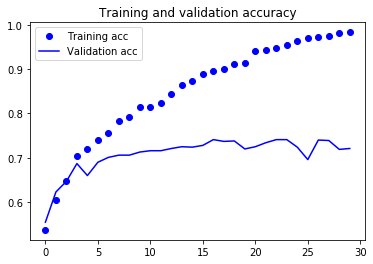

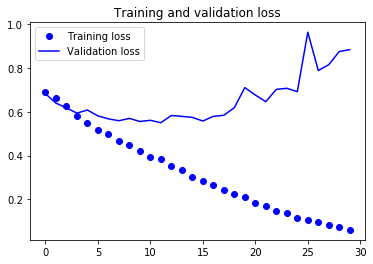

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# plt.plot(X, Y, 선 옵션, label= 범례 제목)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
# 과대적합이 일찍 일어났다는 것은 데이터가 부족하단 의미

# 데이터 증식 사용하기¶
많은 양을 구하기 어려운 과제의 경우 인위적으로 데이터 양을 늘려서 충분히 학습할 수 있도록 한다.

ex) 회사 얼굴 인식 시스템에 필요한 사원의 사진 수에 제한이 있음

In [15]:
datagen = ImageDataGenerator(
    # 랜덤 회전하는 각도 범위
      rotation_range=40,
    # 이동 너비, 전체 넓이가 100이라면 100*0.2= 20픽셀 내외로 좌우 이동
      width_shift_range=0.2,
    # 이동 너비, 전체 넓이가 100이라면 100*0.2= 20픽셀 내외로 좌우 이동
      height_shift_range=0.2,
    # 시계 반대 방향으로 밀림 강도만큼 변형(이미지가 늘어나는 효과)
      shear_range=0.2,
    # 확대/축소 (1 -수치 ~  1 +수치)
      zoom_range=0.2,
    # 수평으로 뒤집기
      horizontal_flip=True,
      fill_mode='nearest')

(2, 150, 150, 3)
2
(2, 150, 150, 3)
2
(1, 150, 150, 3)
1
(2, 150, 150, 3)
2
(2, 150, 150, 3)
2


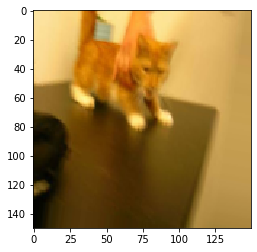

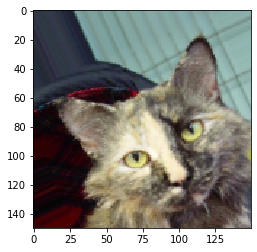

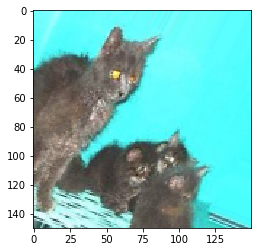

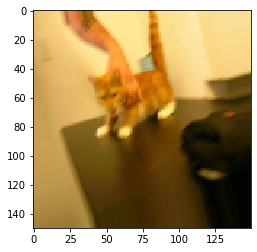

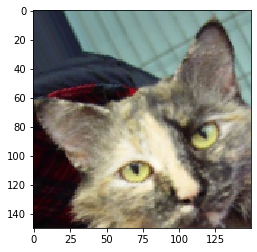

In [118]:
# 이미지 전처리 유틸리티 모듈
from keras.preprocessing import image

# listdir에는 해당 디렉터리의 파일 이름이 리스트에 저장됨. 이를 join을 통해 절대주소와 연결해서 이터러블 객체로 저장
fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])
'''
# 증식할 이미지 선택합니다
img_path = fnames[3]

# 이미지를 읽고 크기를 변경합니다
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 크기의 넘파이 배열로 변환합니다( 컬러니까 채널 3)
x = image.img_to_array(img)

# (1, 150, 150, 3) 크기로 변환합니다 
x = x.reshape((1,) + x.shape)

# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성합니다.
# 무한 반복되기 때문에 어느 지점에서 중지해야 합니다!
i = 0
# flow는 (이미지데이터 배열, 라벨데이터 배열) 출력
for batch in datagen.flow(x, batch_size=2): # batch는 각 batch의 모든 데이터
    plt.figure(i)
    # batch[0]: 이미지데이터 배열을 선택
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    print(batch.shape)
    print(len(batch))
    i += 1
    if i % 4 == 0:
        break

plt.show()

'''
img_path = fnames[0:5]
y=[]
for i in range(len(img_path)):
    img = image.load_img(img_path[i], target_size=(150, 150))
    x = image.img_to_array(img)
    y.append(x)
y = np.array(y)
i = 0
# flow는 (이미지데이터 배열, 라벨데이터 배열) 출력
# 옵션에서 shuffle=False 하면 이미지를 섞지 않고 추출
for batch in datagen.flow(y, batch_size=2, shuffle=False): 
    plt.figure(i)
    # batch[0]: 이미지데이터 배열을 선택
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    print(batch.shape)
    print(len(batch))
    i += 1
    if i % 5 == 0:
        break


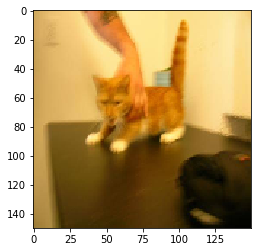

In [116]:
img_path = fnames[0:5]
for i in img_path:
    
    # batch[0]: 이미지데이터 배열을 선택
    plt.imshow(image.array_to_img(y[0]))
    

['./datasets/cats_and_dogs_small\\train\\cats\\cat.0.jpg',
 './datasets/cats_and_dogs_small\\train\\cats\\cat.1.jpg']

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
# 증식된 데이터는 기존 이미지와 상호 연관성이 크므로 과대적합을 제거하기에 충분하지 않아서 drop-out 추가
model.add(layers.Dropout(0.5)) # 0.5를 죽임
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [18]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리(디렉터리 내의 모든 파일이 위에 설정한 틀에 맞춰 바뀜)
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        # 각 배치에 한 이미지의 변형본 32개가 생성됨
        batch_size=50,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      # 한 에폭 당 배치가 100개니까 데이터 수는 32*100개
      steps_per_epoch=100,
      # 에폭이 100이니까 사용되는 데이터 수는 32*100*100개
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 23s 232ms/step - loss: 0.6910 - acc: 0.5291 - val_loss: 0.6853 - val_acc: 0.5044
Epoch 2/100
100/100 [==============================] - 27s 275ms/step - loss: 0.6804 - acc: 0.5603 - val_loss: 0.6936 - val_acc: 0.5090
Epoch 3/100
100/100 [==============================] - 40s 396ms/step - loss: 0.6625 - acc: 0.6047 - val_loss: 0.7116 - val_acc: 0.5368
Epoch 4/100
100/100 [==============================] - 30s 299ms/step - loss: 0.6432 - acc: 0.6284 - val_loss: 0.6545 - val_acc: 0.6012
Epoch 5/100
100/100 [==============================] - 32s 322ms/step - loss: 0.6237 - acc: 0.6528 - val_loss: 0.6058 - val_acc: 0.6485
Epoch 6/100
100/100 [==============================] - 34s 341ms/step - loss: 0.6026 - acc: 0.6797 - val_loss: 0.5713 - val_acc: 0.6772
Epoch 7/100
100/100 [==============================] - 37s 365ms/step - loss: 0.6077 - acc: 0.6656 -

In [20]:
model.save('cats_and_dogs_small_2.h5')


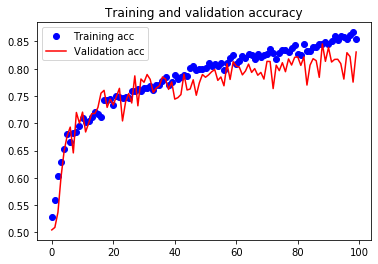

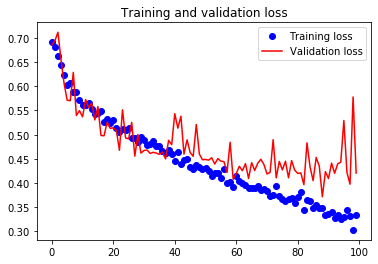

In [120]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.predict()